# Day 6: Probably a Fire Hazard

Because your neighbors keep defeating you in the holiday house decorating contest year after year, you've decided to deploy one million lights in a 1000x1000 grid.

Furthermore, because you've been especially nice this year, Santa has mailed you instructions on how to display the ideal lighting configuration.

Lights in your grid are numbered from 0 to 999 in each direction; the lights at each corner are at 0,0, 0,999, 999,999, and 999,0. The instructions include whether to turn on, turn off, or toggle various inclusive ranges given as coordinate pairs. Each coordinate pair represents opposite corners of a rectangle, inclusive; a coordinate pair like 0,0 through 2,2 therefore refers to 9 lights in a 3x3 square. The lights all start turned off.

To defeat your neighbors this year, all you have to do is set up your lights by doing the instructions Santa sent you in order.

For example:
- turn on 0,0 through 999,999 would turn on (or leave on) every light.
- toggle 0,0 through 999,0 would toggle the first line of 1000 lights, turning off the ones that were on, and turning on the ones that were off.
- turn off 499,499 through 500,500 would turn off (or leave off) the middle four lights.

After following the instructions, **how many lights are lit?**

## Read input

First we read all lines from the input file.

In [90]:
with open("input.txt", "r") as file:
    lines=file.readlines()
print( f"Read {len(lines)} lines of instructions")

Read 300 lines of instructions


Then we parse them with regular expressions:

In [91]:
import re

instructions = []
for line in lines:
    match = re.search("(turn on|turn off|toggle) (\d*),(\d*) through (\d*),(\d*)", line)
    if match:
        instructions.append({
            'command': match.group(1),
            'x1': int(match.group(2)),
            'y1': int(match.group(3)),
            'x2': int(match.group(4)),
            'y2': int(match.group(5))
        })
print(f"Parsed {len(instructions)} instructions")        

Parsed 300 instructions


## Puzzle 1

### Apply instructions

In [93]:
import numpy as np
lights = np.zeros((1000, 1000), dtype=bool)

for instruction in instructions:
    x1, x2, y1, y2 = instruction['x1'],  instruction['x2'],  instruction['y1'],  instruction['y2']
    if instruction['command'] == "turn on":
        lights[x1:x2+1, y1:y2+1] =  True
    elif instruction['command'] == "turn off":
        lights[x1:x2+1, y1:y2+1] =  False
    elif instruction['command'] == "toggle":
        lights[x1:x2+1, y1:y2+1] = np.logical_not(lights[x1:x2+1, y1:y2+1]) 
        
lights_on = np.count_nonzero(lights)        
print(f"{lights_on} lights are lit")    

543903 lights are lit


### Show Santa's light grid

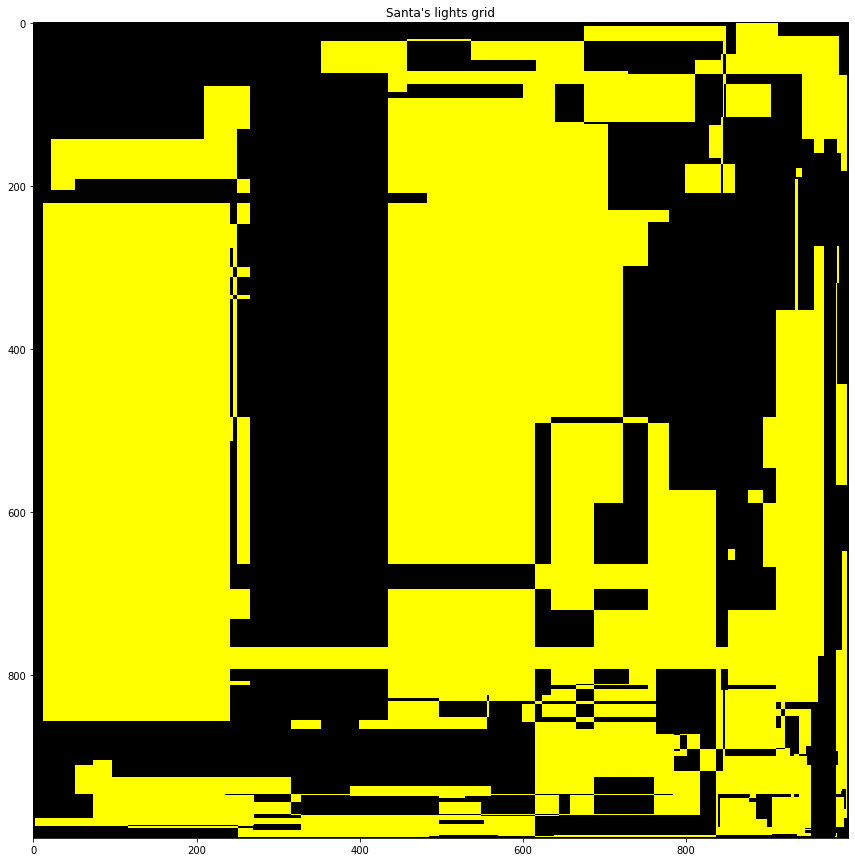

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline

rgb = np.zeros((1000, 1000, 3), dtype=np.uint8)
rgb[np.where(lights)] = [255, 255, 0]   # Set pixels where lights are True to yellow

fig1 = plt.figure(figsize = (15,15))
ax = fig1.add_subplot(111)
ax.imshow(rgb, interpolation='none')
ax.set_title("Santa's lights grid")
plt.show()